In [2]:
import pandas as pd
import numpy as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

# Load the dataset
df = pd.read_csv("Playstore_Clean_Data.csv")
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10,10,15,True,...,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,26-Feb-20,26-Feb-20,Everyone,https://beniyizibyose.tk/projects/,False,False,False
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,5000,5000,7662,True,...,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,21-May-20,6-May-21,Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False
2,2,GROW.me,com.horodyski.grower,Tools,0.0,0,100,100,478,True,...,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,21-Feb-20,12-Nov-18,Everyone,http://www.horodyski.com.pl,False,False,False
3,3,IMOCCI,com.imocci,Social,0.0,0,50,50,89,True,...,Imocci GmbH,http://www.imocci.com,info@imocci.com,24-Dec-18,20-Dec-19,Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False
4,4,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820,50000,50000,62433,True,...,Free 2021 Themes for Emoji keyboard,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,22-Sep-19,7-Oct-20,Everyone,http://bit.ly/EmojiThemePro,True,False,False


In [4]:
df.shape

(12657, 23)

# Q1. Top 5 High Rated App

In [6]:
high_rated = df[['App Name', 'Rating']].sort_values(by='Rating', ascending=False).head(5)
print(high_rated)

                                          App Name  Rating
7283                                  Airlifestore     5.0
9397                       Wildwood Calvary Chapel     5.0
11583  वाजसनेयिनाम्  उपनयनपध्दतिः, Upnayan Sanskar     5.0
2415                 LAKschool - Quiz & Lernportal     5.0
2423                                 Fitt Life Gym     5.0


# Q2. Top 5 Category with Highest Rating and Installation

In [7]:
highest_rating_install = df.groupby('Category').agg({'Rating': 'mean', 'Installs': 'sum'}).sort_values(by='Installs', ascending=False).head(5)
print(highest_rating_install)


                           Rating   Installs
Category                                    
Racing                   3.502000  175205750
Action                   3.180000  170592881
Tools                    2.491489  147759445
Sports                   2.564516  134298069
Video Players & Editors  3.132857  118917470


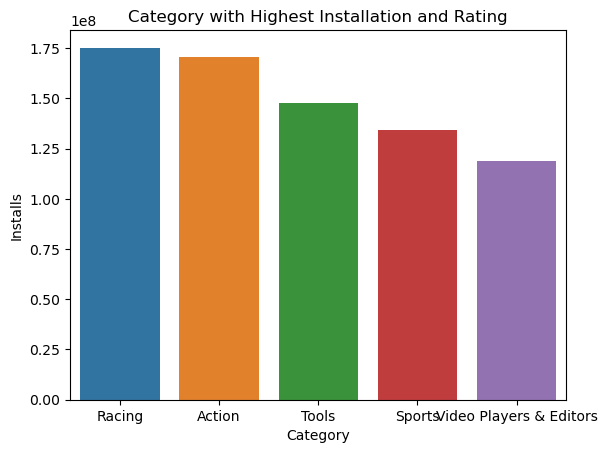

In [8]:
category_stats = df.groupby('Category').agg({'Rating': 'mean', 'Installs': 'sum'}).reset_index()
category_stats = category_stats.sort_values(by='Installs', ascending=False).head(5)

sns.barplot(y='Installs', x='Category', data=category_stats)
plt.title('Category with Highest Installation and Rating')
plt.show()


# Q3. Percentage of Free/ Paid App 

Count of apps (True/False):
True     12424
False      233
Name: Free, dtype: int64


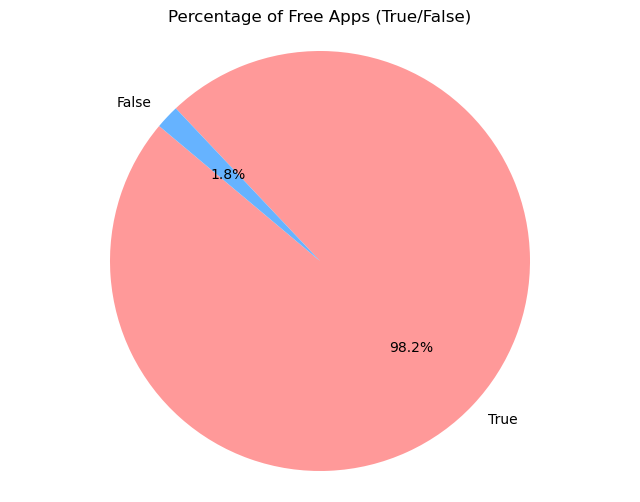

In [12]:
free_count = df['Free'].value_counts()
true_mean = df[df['Free'] == True]['Free'].count()
false_mean = df[df['Free'] == False]['Free'].count()

print("Count of apps (True/False):")
print(free_count)

free_percentage = (free_count / free_count.sum()) * 100
plt.figure(figsize=(8, 6))
plt.pie(free_percentage, labels=free_percentage.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Percentage of Free Apps (True/False)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Q4.  Do Free Apps Tend to Have Higher Ratings than Paid Apps?

    Free    Rating
0  False  2.339485
1   True  2.307276


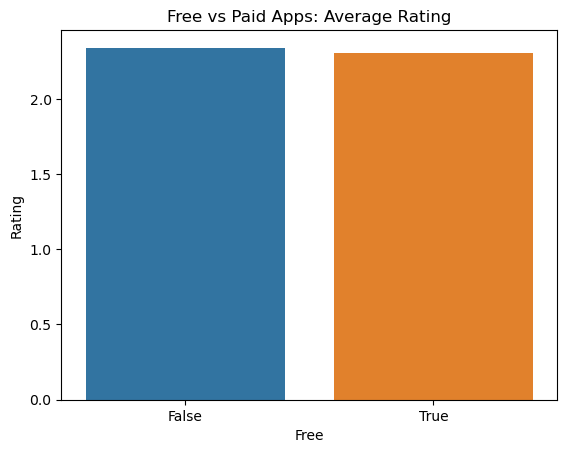

In [15]:
free_vs_paid_rating = df.groupby('Free')['Rating'].mean().reset_index()
print(free_vs_paid_rating)
sns.barplot(x='Free', y='Rating', data=free_vs_paid_rating)
plt.title('Free vs Paid Apps: Average Rating')
plt.show()

# Q5. Top 5 app have highest price.

In [19]:
def top_5_highest_price_apps():
    top_5_apps = df.sort_values(by='Price', ascending=False).head(5)
    return top_5_apps[['App Name', 'Price', 'Editors Choice']]
print(top_5_highest_price_apps())

                                           App Name   Price  Editors Choice
6827  Clinical Biochemistry: Metabolic & Clin Asp 3  119.99           False
757                                    Sub Rosa Pro   99.99           False
3423                  CURRENT D & T Emerg Med, 7 Ed   72.95           False
7287         Cardiothoracic Surgery, Second Edition   65.99           False
4218         Wörterbuch Griechisch PREMIUM von PONS   54.99           False


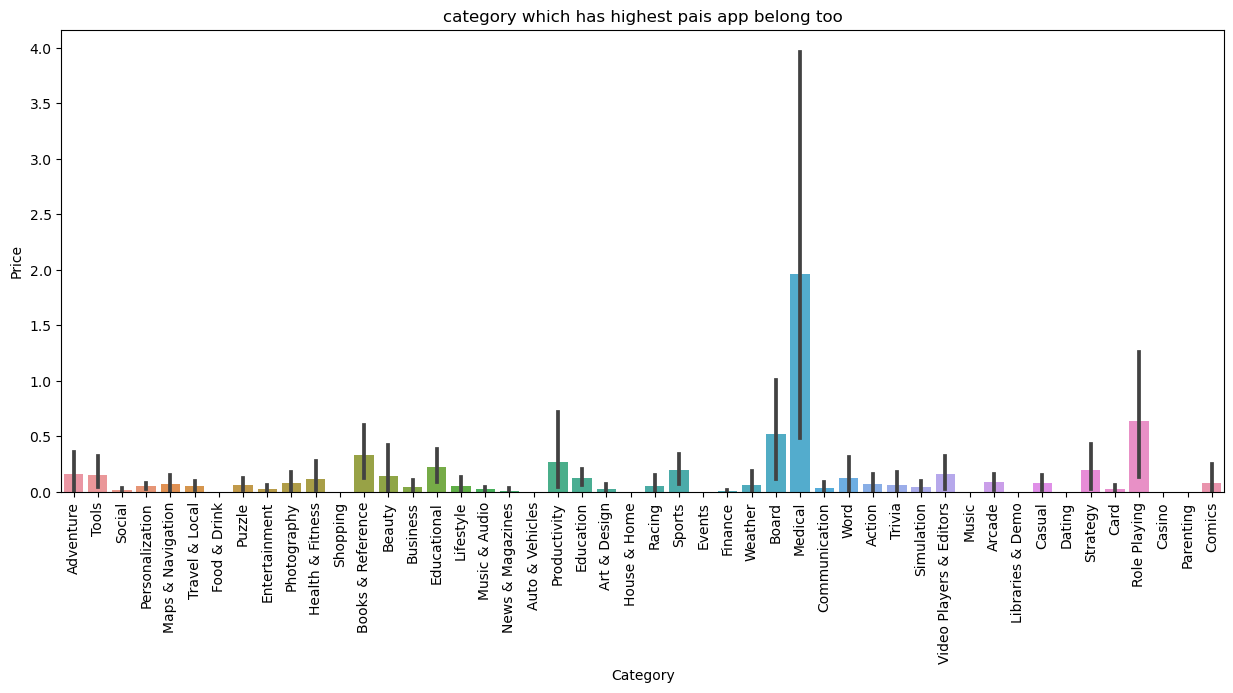

In [92]:
plt.figure(figsize=(15,6))
sns.barplot(data =df ,x=df['Category'], y=df['Price'])
plt.xticks(rotation = 90)
plt.title("category which has highest pais app belong too")
plt.show()

# Q6.  top 5 rating app information

In [20]:
def top_5_app_with_free():
    high_rated = df[['App Name', 'Rating','Category','Free','In App Purchases','Installs','Editors Choice']].sort_values(by='Rating', ascending=False).head(5)
    return high_rated[['App Name', 'Rating', 'Category','Free','In App Purchases','Installs','Editors Choice']]
    print(high_rated)    
top_5_app_with_free()

,App Name,Rating,Category,Free,In App Purchases,Installs,Editors Choice
7283,Airlifestore,5.0,Shopping,True,False,500,False
9397,Wildwood Calvary Chapel,5.0,Education,True,False,500,False
11583,"वाजसनेयिनाम् उपनयनपध्दतिः, Upnayan Sanskar",5.0,Books & Reference,True,False,1000,False
2415,LAKschool - Quiz & Lernportal,5.0,Education,True,False,100,False
2423,Fitt Life Gym,5.0,Health & Fitness,True,False,100,False


# Q7. Top app category have max installs (100 million + installs)

In [30]:
def Top_5_maxSixe_App():
    data = df[(df['Installs'] > 80000000)]  
    return data[['Category']]
print(Top_5_maxSixe_App())

                      Category
702    Video Players & Editors
1753                    Sports
11446                   Racing


# Q8 --> Size of app impact on installation?

In [32]:
def size_vs_installation_impact():
    size_install_impact = df[['Size', 'Installs']].head(5).groupby('Size').mean().reset_index()
    return size_install_impact
    print(size_vs_installation_impact())
    
size_vs_installation_impact()

,Size,Installs
0,2.9,5000.0
1,3.5,50000.0
2,6.2,100.0
3,10.0,10.0
4,46.0,50.0


# Q9. top category(rating base) Avg Rating (With Purchases) + Avg Rating (Without Purchases)

Comparison of Ratings with and without In-App Purchases:
                 Avg Rating (With Purchases)  Avg Rating (Without Purchases)
Category                                                                    
Action                              3.563265                        2.872131
Adventure                           3.478571                        2.962712
Arcade                              3.131373                        2.553623
Art & Design                        4.280000                        2.177922
Auto & Vehicles                     3.400000                        1.992784


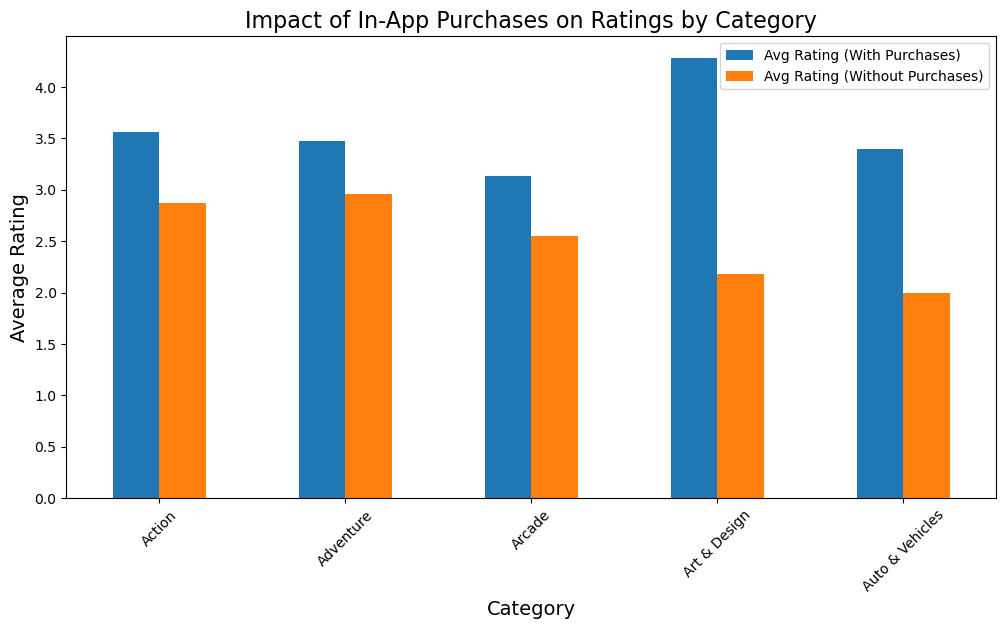

In [35]:
def in_app_purchases_impact_on_ratings():
    apps_with_purchases = df[df['In App Purchases'] == True]
    apps_without_purchases = df[df['In App Purchases'] == False]

    ratings_with_purchases = apps_with_purchases.groupby('Category')['Rating'].mean().head(5)
    ratings_without_purchases = apps_without_purchases.groupby('Category')['Rating'].mean().head(5)

    rating_comparison = pd.DataFrame({
        'Avg Rating (With Purchases)': ratings_with_purchases,
        'Avg Rating (Without Purchases)': ratings_without_purchases
    }).fillna(0)

    print("Comparison of Ratings with and without In-App Purchases:")
    print(rating_comparison)
    
    rating_comparison.plot(kind='bar', figsize=(12, 6))
    plt.title('Impact of In-App Purchases on Ratings by Category', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()
in_app_purchases_impact_on_ratings()


# Q10. Top category(rating base) Avg Rating (With EC) + Avg Rating (Without Ec)


Comparison of Ratings with and without EC:
                  Avg Rating (With EC)  Avg Rating (Without EC)
Category                                                       
Action                             0.0                 3.180000
Adventure                          4.0                 3.118605
Arcade                             0.0                 2.709524
Art & Design                       0.0                 2.306098
Auto & Vehicles                    0.0                 2.061765
Education                          4.6                 0.000000
Health & Fitness                   4.2                 0.000000
Puzzle                             4.3                 0.000000
Strategy                           4.0                 0.000000


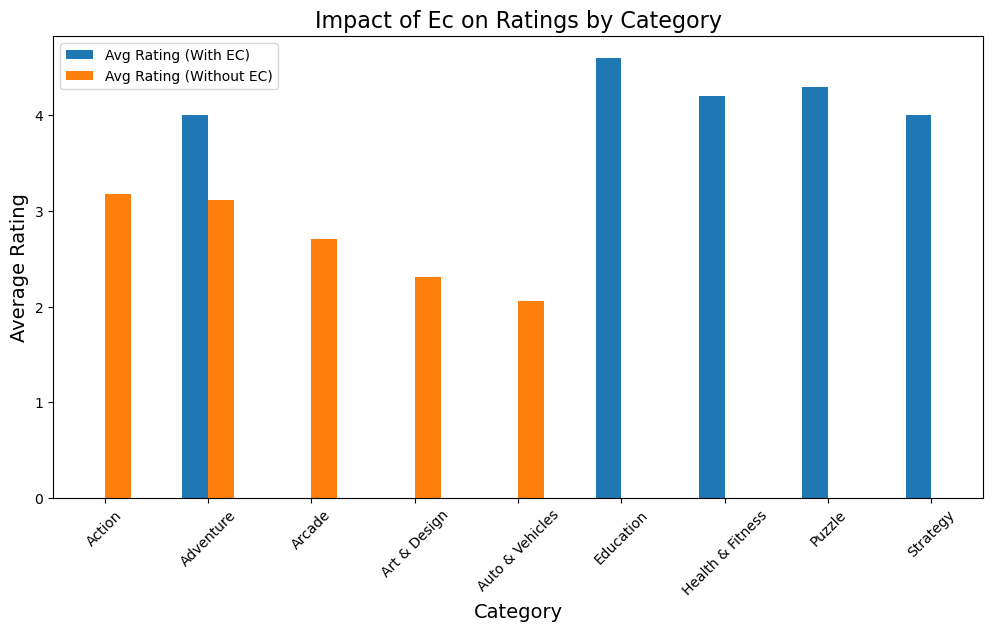

In [37]:
def EC_impact_on_ratings():
    apps_with_EC = df[df['Editors Choice'] == True]
    apps_without_EC = df[df['Editors Choice'] == False]

    ratings_with_EC = apps_with_EC.groupby('Category')['Rating'].mean().head(5)
    ratings_without_EC = apps_without_EC.groupby('Category')['Rating'].mean().head(5)

    rating_comparison = pd.DataFrame({
        'Avg Rating (With EC)': ratings_with_EC,
        'Avg Rating (Without EC)': ratings_without_EC
    }).fillna(0)

    print("Comparison of Ratings with and without EC:")
    print(rating_comparison)
    
    rating_comparison.plot(kind='bar', figsize=(12, 6))
    plt.title('Impact of Ec on Ratings by Category', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

EC_impact_on_ratings()

# Q11. Avg rating with Percenrage of Content Rating  

In [39]:
def avg_rating_by_content_rating():
    avg_ratings = df.groupby('Content Rating')['Rating'].mean()
    total_ratings = df['Rating'].count()

    content_rating_counts = df['Content Rating'].value_counts()
    percentage = (content_rating_counts / total_ratings) * 100

    results = pd.DataFrame({
        'Avg Rating': avg_ratings,
        'Percentage of Total Ratings': percentage
    }).fillna(0)  # Fill NaN values with 0

    print("Average Ratings and Percentage by Content Rating:")
    print(results)

avg_rating_by_content_rating()

Average Ratings and Percentage by Content Rating:
                 Avg Rating  Percentage of Total Ratings
Adults only 18+    0.000000                     0.007901
Everyone           2.273179                    87.105949
Everyone 10+       2.941000                     1.580153
Mature 17+         2.585503                     2.670459
Teen               2.460440                     8.627637
Unrated            0.000000                     0.007901


# Q12. Average Ratings and Percentage by Each Category

In [42]:
def avg_rating_by_Cat():
    avg_ratings = df.groupby('Category')['Rating'].mean()

    total_ratings = df['Rating'].count()

    cat_rating_counts = df['Category'].value_counts()
    percentage = (cat_rating_counts / total_ratings) *100

    results = pd.DataFrame({
        'Avg Rating': avg_ratings,
        '    % Total Ratings': percentage
    }).fillna(0)  # Fill NaN values with 0

    print("Average Ratings and Percentage by Cat:")
    print(results)

avg_rating_by_Cat()


Average Ratings and Percentage by Cat:
                         Avg Rating      % Total Ratings
Action                     3.180000             0.869084
Adventure                  3.128736             0.687367
Arcade                     2.709524             1.493245
Art & Design               2.306098             0.647863
Auto & Vehicles            2.061765             0.805878
Beauty                     1.579104             0.529351
Board                      3.237736             0.418741
Books & Reference          2.609797             4.274315
Business                   1.464395             7.766453
Card                       3.400000             0.363435
Casino                     3.303571             0.221221
Casual                     2.854054             1.753970
Comics                     1.733333             0.094809
Communication              1.917091             2.172711
Dating                     2.915385             0.205420
Education                  2.435376             9

# Q13. Top Category count of app with in app purchases count

In [45]:
def get_top_categories_with_inappPurch():
    data = df[df['In App Purchases'] == True]  

    total_apps = df['Category'].value_counts()
    apps_with_purchases = data['Category'].value_counts()

    purchase_data = pd.DataFrame({
        'total_apps': total_apps,
        'apps_with_purchases': apps_with_purchases
    }).fillna(0)
    top_5_total_apps = purchase_data.nlargest(5, 'total_apps')
    print(top_5_total_apps)

print(get_top_categories_with_inappPurch())


               total_apps  apps_with_purchases
Education            1224                108.0
Business              983                 25.0
Music & Audio         871                 29.0
Lifestyle             704                 45.0
Tools                 658                 57.0
None


# Q 14. Top  categories by total app_count with percentage from  total app

In [48]:
def categories_with_count():
    # Count total apps by category
    total_apps = df['Category'].value_counts()
    purchase_data = pd.DataFrame({'total_apps': total_apps})
    
    # Get the top 5 categories by total app count
    top_5_total_apps = purchase_data.nlargest(5, 'total_apps')

    # Calculate the percentage of total apps for these top 5 categories
    total_app_count = total_apps.sum()  # Total number of apps across all categories
    top_5_total_apps['percentage'] = (top_5_total_apps['total_apps'] / total_app_count) * 100

    print("Top 5 categories by total apps with percentage of total apps:")
    print(top_5_total_apps)
    
       
categories_with_count()

Top 5 categories by total apps with percentage of total apps:
               total_apps  percentage
Education            1224    9.670538
Business              983    7.766453
Music & Audio         871    6.881568
Lifestyle             704    5.562140
Tools                 658    5.198704


# Q 15. Do Free Apps Tend to Have Higher Ratings than Paid Apps? 

    Free    Rating
0  False  2.339485
1   True  2.307276


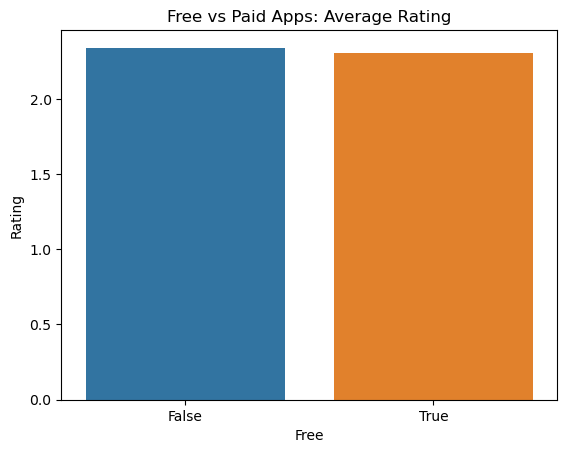

In [50]:
free_vs_paid_rating = df.groupby('Free')['Rating'].mean().reset_index()
print(free_vs_paid_rating)
sns.barplot(x='Free', y='Rating', data=free_vs_paid_rating)
plt.title('Free vs Paid Apps: Average Rating')
plt.show()


# paid app high rating

# Q.16 - Installation Count with rescept In-App Purchases  
    


   In App Purchases    Installs
0             False   711748193
1              True  1077293712


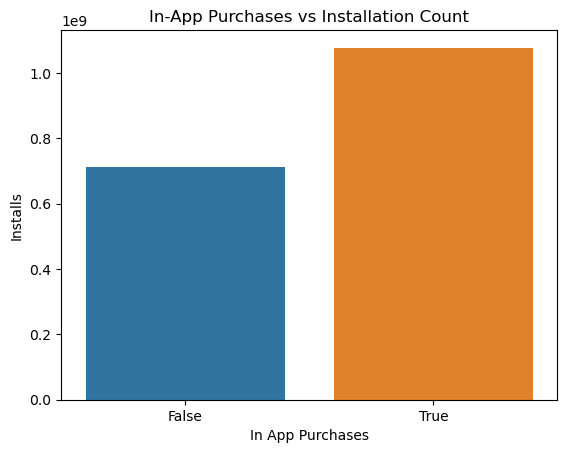

In [53]:
iap_vs_installs = df.groupby('In App Purchases')['Installs'].sum().reset_index()
print(iap_vs_installs)
sns.barplot(x='In App Purchases', y='Installs', data=iap_vs_installs)
plt.title('In-App Purchases vs Installation Count')
plt.show()


# Q 17. yearly avg rating

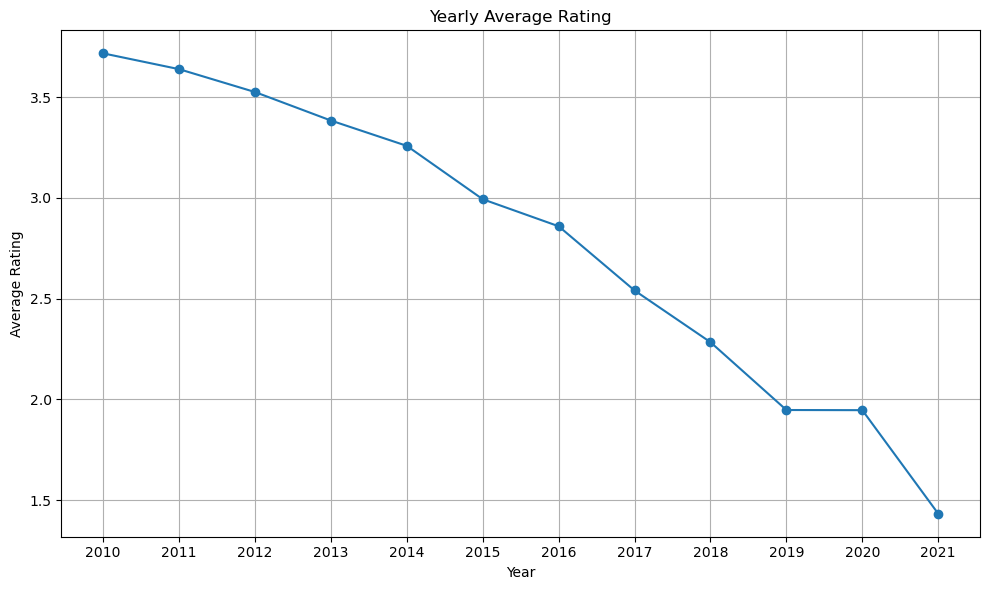

In [56]:
df['Released'] = pd.to_datetime(df['Released'])  # Convert 'Released' column to datetime
yearly_average_rating = df.groupby(df['Released'].dt.year)['Rating'].mean()

plt.figure(figsize=(10, 6))  
plt.plot(yearly_average_rating.index, yearly_average_rating.values, marker='o') 
plt.title('Yearly Average Rating')  
plt.xlabel('Year') 
plt.ylabel('Average Rating') 
plt.xticks(yearly_average_rating.index)  
plt.grid()  
plt.tight_layout()
plt.show()  



# Q 18. category which contain top avg installs and avg_rating also Free

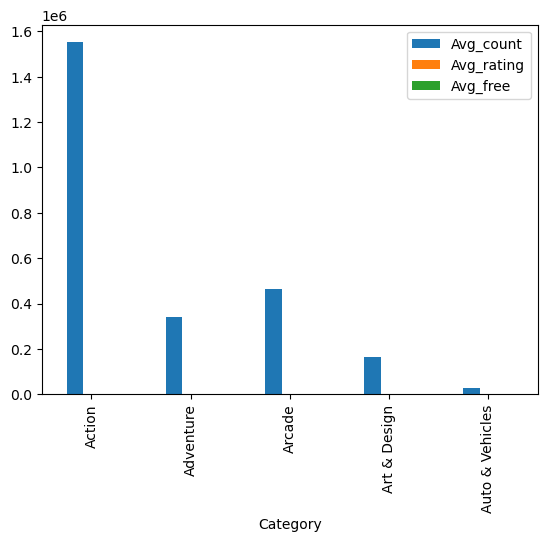

In [66]:
avg_spend = df.groupby('Category').agg(
    Avg_count=('Installs', 'mean'),
    Avg_rating=('Rating', 'mean'),
    Avg_free=('Free', 'mean'),    
).head(5).plot(kind='bar')

# Q 19. which category has Editors Choice as well as High Rating

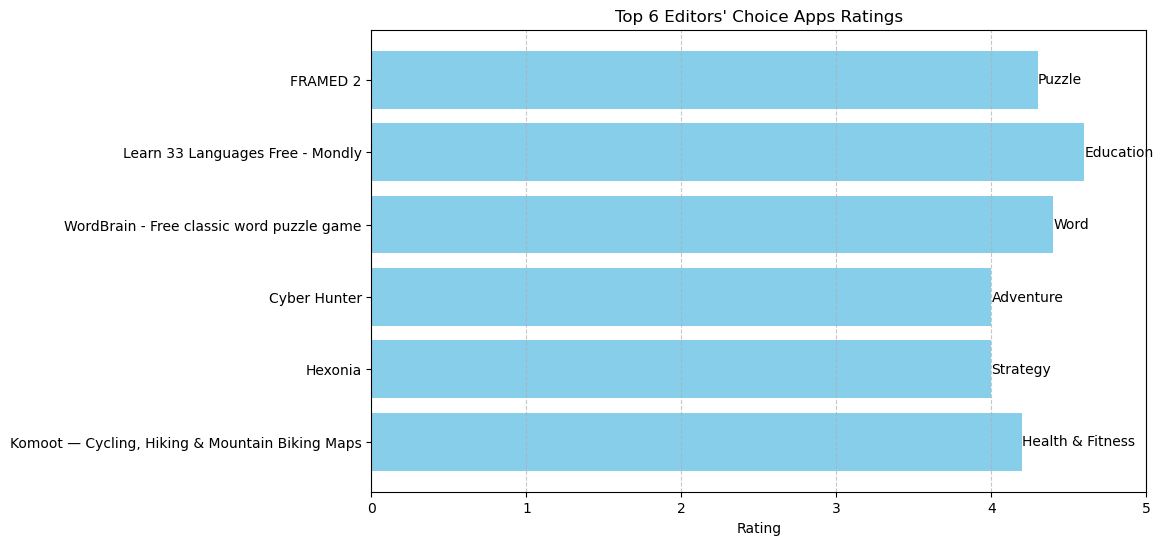

In [69]:
df_top_apps = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_top_apps['App Name'], df_top_apps['Rating'], color='skyblue')

plt.xlabel('Rating')
plt.title('Top 6 Editors\' Choice Apps Ratings')
for bar, category in zip(bars, df_top_apps['Category']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, category, 
             va='center', ha='left', color='black', fontsize=10)

plt.xlim(0, 5)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()



# Q 20. per year installition as per perticular category 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5692\1574065750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Released'] = pd.to_datetime(category_df['Released'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5692\1574065750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Year'] = category_df['Released'].dt.year


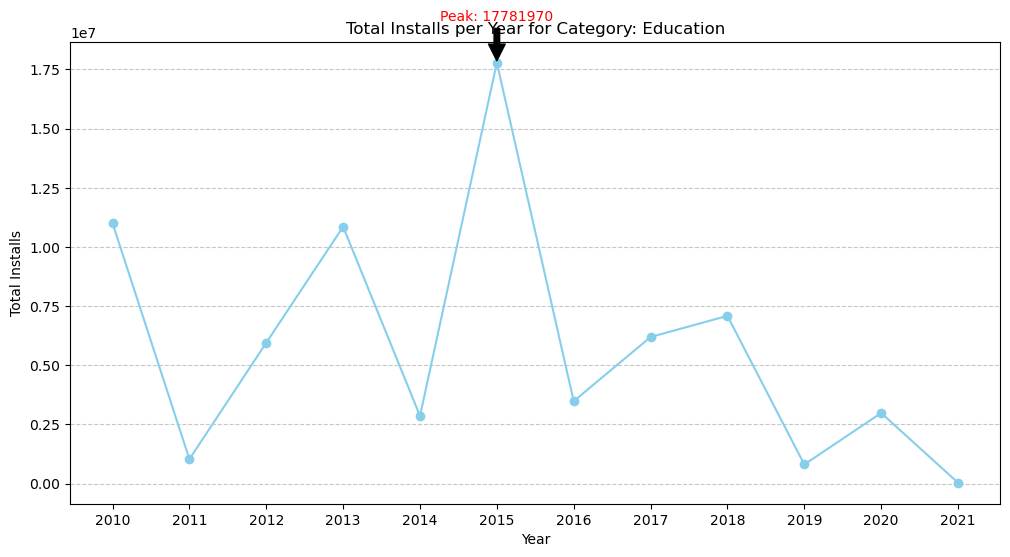

In [71]:
def plot_installs_per_year(df, category):
    category_df = df[df['Category'] == category]
    
    if category_df.empty:
        print(f"No data found for category: {category}")
        return
    
    category_df['Released'] = pd.to_datetime(category_df['Released'])

    category_df['Year'] = category_df['Released'].dt.year

    yearly_installs = category_df.groupby('Year')['Installs'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    plt.plot(yearly_installs['Year'], yearly_installs['Installs'], marker='o', color='skyblue')

    max_installs = yearly_installs['Installs'].max()
    peak_year = yearly_installs[yearly_installs['Installs'] == max_installs]['Year'].values[0]
    plt.annotate(f'Peak: {max_installs}', 
                 xy=(peak_year, max_installs), 
                 xytext=(peak_year, max_installs * 1.1),  # Offset text above the peak
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red', ha='center')

    plt.title(f'Total Installs per Year for Category: {category}')
    plt.xlabel('Year')
    plt.ylabel('Total Installs')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(yearly_installs['Year'])  # Show all years on the x-axis
    plt.show()


plot_installs_per_year(df, 'Education')

# Q 21. Per year rating count of perticular category 

C:\Users\DELL\AppData\Local\Temp\ipykernel_5692\3568667991.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Released'] = pd.to_datetime(category_df['Released'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_5692\3568667991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Year'] = category_df['Released'].dt.year


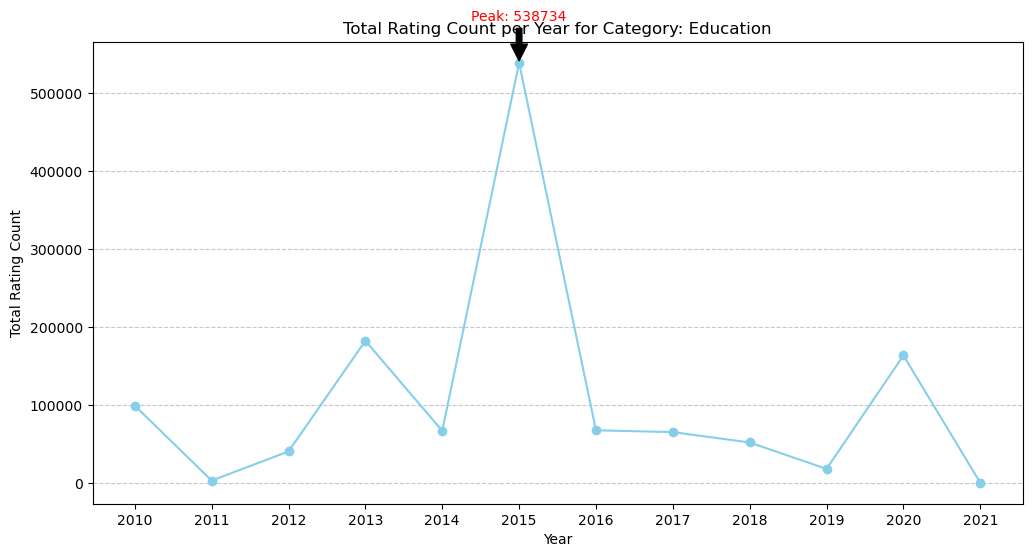

In [73]:
def plot_rating_count_per_year(df, category):
    category_df = df[df['Category'] == category]
    
    if category_df.empty:
        print(f"No data found for category: {category}")
        return
    
    category_df['Released'] = pd.to_datetime(category_df['Released'])

    category_df['Year'] = category_df['Released'].dt.year

    yearly_rating_count = category_df.groupby('Year')['Rating Count'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_rating_count['Year'], yearly_rating_count['Rating Count'], marker='o', color='skyblue')

    max_rating_count = yearly_rating_count['Rating Count'].max()
    peak_year = yearly_rating_count[yearly_rating_count['Rating Count'] == max_rating_count]['Year'].values[0]
    plt.annotate(f'Peak: {max_rating_count}', 
                 xy=(peak_year, max_rating_count), 
                 xytext=(peak_year, max_rating_count * 1.1),  # Offset text above the peak
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red', ha='center')

    plt.title(f'Total Rating Count per Year for Category: {category}')
    plt.xlabel('Year')
    plt.ylabel('Total Rating Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(yearly_rating_count['Year'])  # Show all years on the x-axis
    plt.show()

plot_rating_count_per_year(df, 'Education')


# Q 22. which category has top paid app 

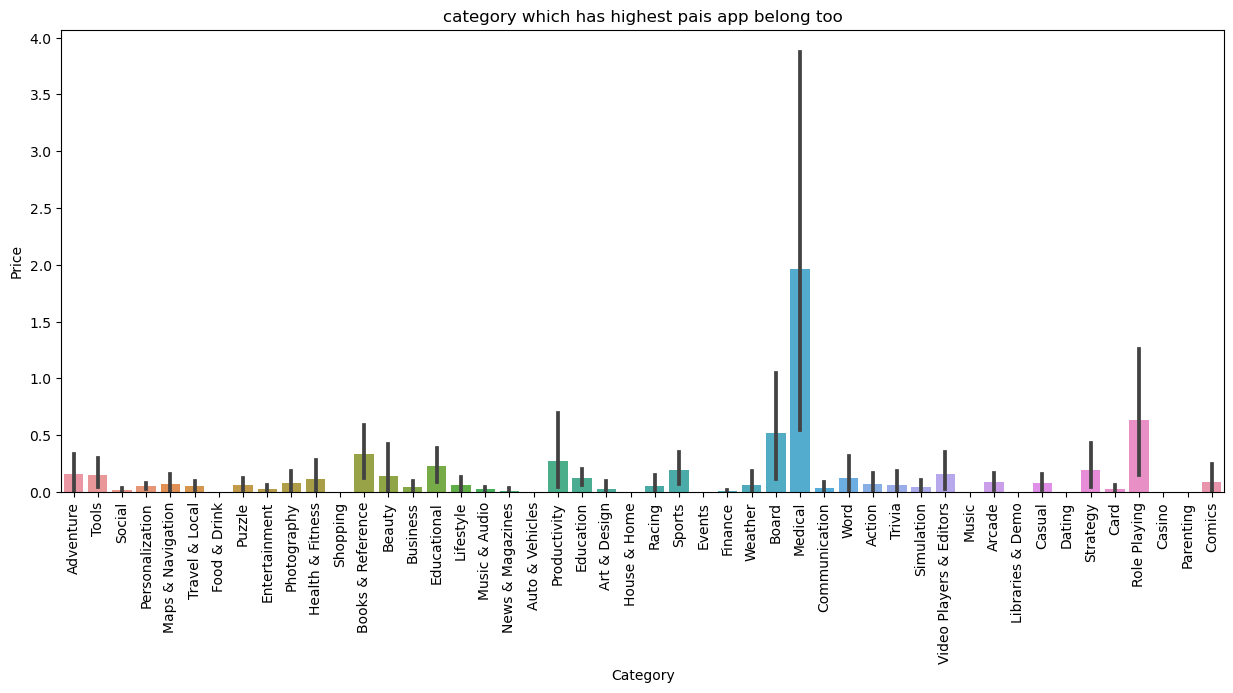

In [80]:
plt.figure(figsize=(15,6))
sns.barplot(data =df, x = df['Category'], y = df['Price'])
plt.xticks(rotation = 90)
plt.title("category which has highest pais app belong too")
plt.show()

# Q 23. which category has top installation 

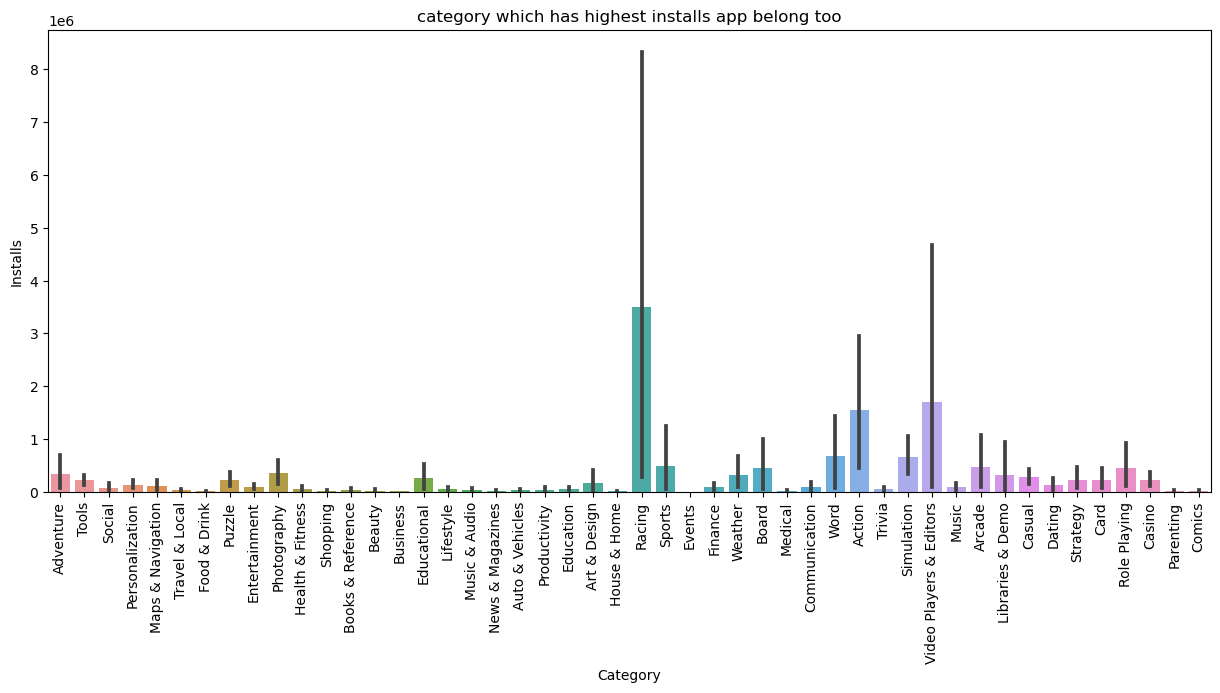

In [82]:
plt.figure(figsize=(15,6))
sns.barplot(data =df ,x=df['Category'], y=df['Installs'])
plt.xticks(rotation = 90)
plt.title("category which has highest installs app belong too")
plt.show()

# Q 24. Top 5 Highest Rated & Installed Apps compared with released date & last update

In [84]:
top_apps = df.sort_values(by=['Rating', 'Installs'], ascending=[False, False]).head(5)
print(top_apps[['App Name','Category', 'Released','Last Updated']])


                                             App Name           Category  \
7633                                        INSTAWASH    Auto & Vehicles   
178                                           Fazzaco           Business   
2187  ILLUST CHAINER English edition online multiplay              Board   
3314                                     قمر بني هاشم  Books & Reference   
3514                   Orthodox prayers audio offline      Music & Audio   

       Released Last Updated  
7633 2015-11-11    14-Jun-21  
178  2020-06-09    17-May-21  
2187 2020-09-21    22-Jan-21  
3314 2017-04-30    30-Apr-17  
3514 2018-11-26    22-Feb-20  


#    RECOMMENDATION SYSTEM

# provide category + installs + rating----> app name, free, Developer_email

In [89]:
def recommend_apps(df, category, min_installs, min_rating):
    filtered_apps = df[
        (df['Category'] == category) &
        (df['Installs'] >= min_installs) &
        (df['Rating'] >= min_rating)
    ]
    recommendations = filtered_apps[['App Name', 'Free', 'Developer Email']]  
    return recommendations

In [90]:
recommend_apps(df, 'Education', 1000000, 4.5)

,App Name,Free,Developer Email
2945,Learn Russian FREE 🇷🇺,True,support@mondly.com
4168,English Listening and Speaking,True,miraclefunbox@gmail.com
4564,"Zenius - Belajar Online Seru | UTBK, UM, PTS, PAS",True,cs@zenius.net
5124,Learn 33 Languages Free - Mondly,True,support@mondly.com
9746,Learn English with Johnny Grammar's Word Chall...,True,learnenglish.mobile@britishcouncil.org
